# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.layers.normalization import BatchNormalization
from keras import optimizers

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


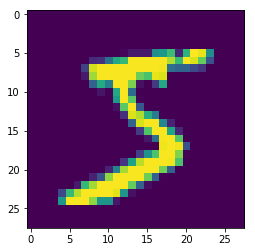

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

**First Model** - with following specifications

1. No Batch Normalizations
2. No Max Pooling
3. No Drop outs
4. No Change in Learning rate
5. Number of parameters is very high (72K)

This is not at all an ideal model as per the structure. The target network should have less than 15K parameters and accuracy of 99.4% on validation dataset.

In [10]:
model = Sequential()

 
model.add(Convolution2D(16, 3, 3, input_shape=(28,28,1))) #Receptive field 3*3
model.add(Activation('relu'))
model.add(Convolution2D(16, 3, 3)) #Receptive field 5*5
model.add(Activation('relu'))
model.add(Convolution2D(16, 3, 3)) #Receptive field 7*7
model.add(Activation('relu'))
model.add(Convolution2D(16, 3, 3)) #Receptive field 9*9
model.add(Activation('relu'))
model.add(Convolution2D(10, 20))
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

W0825 18:28:34.927598 139628983064448 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
W0825 18:28:34.941245 139628983064448 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0825 18:28:34.943888 139628983064448 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 16)        2320      
_________________________________________________________________
activation_3 (Activation)    (None, 22, 22, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 16)        2320      
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.


In [11]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

W0825 18:28:35.015347 139628983064448 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0825 18:28:35.036573 139628983064448 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [12]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1,
          validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  
W0825 18:28:35.123427 139628983064448 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0825 18:28:35.263279 139628983064448 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 188us/step - loss: 0.1461 - acc: 0.9558 - val_loss: 0.0575 - val_acc: 0.9821
Epoch 2/10
60000/60000 [==============================] - 9s 147us/step - loss: 0.0530 - acc: 0.9842 - val_loss: 0.0501 - val_acc: 0.9837
Epoch 3/10
60000/60000 [==============================] - 9s 148us/step - loss: 0.0382 - acc: 0.9884 - val_loss: 0.0410 - val_acc: 0.9870
Epoch 4/10
60000/60000 [==============================] - 9s 148us/step - loss: 0.0287 - acc: 0.9911 - val_loss: 0.0399 - val_acc: 0.9872
Epoch 5/10
60000/60000 [==============================] - 9s 148us/step - loss: 0.0218 - acc: 0.9927 - val_loss: 0.0457 - val_acc: 0.9866
Epoch 6/10
60000/60000 [==============================] - 9s 148us/step - loss: 0.0165 - acc: 0.9946 - val_loss: 0.0365 - val_acc: 0.9901
Epoch 7/10
60000/60000 [==============================] - 9s 148us/step - loss: 0.0124 - acc: 0.9961 - val_loss: 0.0444 -

As we can see above, the validation accuracy is 99.74% (highest) and Training accuracy is 99.01% (Highest). The difference in accuracies suggest overfitting. Given these accuracies, it is not possible to improve the training and val accuracies to the desired level.

Following 2 changes are suggested in the next network

1. Add Maxpool to reduce the number of parameters - while adding maxpool, we look at the image and assume that the receptive field of 5*5 should be sufficient to generate the required curves for prediction. Hence maxpool to be added after few convolutions.
2. Add 1*1 convolution - again to reduce the number of parameters.

These two changes will also help in reducing the gap between Train and Val accuracies to certain extent.

**Second Model**

In [13]:
model = Sequential()

 
model.add(Convolution2D(16, 3, 3, input_shape=(28,28,1))) #Receptive field 3*3
model.add(Activation('relu'))
model.add(Convolution2D(16, 3, 3)) #Receptive field 5*5
model.add(Activation('relu'))
model.add(MaxPooling2D()) #Receptive field 6*6
model.add(Convolution2D(16, 3, 3)) #Receptive field 10*10
model.add(Activation('relu'))
model.add(Convolution2D(16, 3, 3)) #Receptive field 14*14
model.add(Activation('relu'))
model.add(Convolution2D(10, 1))
model.add(Convolution2D(10, 8))
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
  
W0825 18:30:06.475419 139628983064448 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
activation_6 (Activation)    (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
activation_7 (Activation)    (None, 24, 24, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 16)        2320      
_________________________________________________________________
activation_8 (Activation)    (None, 10, 10, 16)        0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
  # This is added back by InteractiveShellApp.init_path()


In [14]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1,
          validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 162us/step - loss: 0.1702 - acc: 0.9470 - val_loss: 0.0589 - val_acc: 0.9829
Epoch 2/10
60000/60000 [==============================] - 9s 155us/step - loss: 0.0622 - acc: 0.9809 - val_loss: 0.0397 - val_acc: 0.9876
Epoch 3/10
60000/60000 [==============================] - 9s 156us/step - loss: 0.0473 - acc: 0.9859 - val_loss: 0.0437 - val_acc: 0.9857
Epoch 4/10
60000/60000 [==============================] - 9s 156us/step - loss: 0.0384 - acc: 0.9884 - val_loss: 0.0373 - val_acc: 0.9873
Epoch 5/10
60000/60000 [==============================] - 9s 154us/step - loss: 0.0324 - acc: 0.9897 - val_loss: 0.0297 - val_acc: 0.9904
Epoch 6/10
60000/60000 [==============================] - 9s 154us/step - loss: 0.0271 - acc: 0.9916 - val_loss: 0.0320 - val_acc: 0.9895
Epoch 7/10
60000/60000 [==============================] - 10s 160us/step - loss: 0.0238 - acc: 0.9926 - val_loss: 0.0327 

In the above model, following 2 has been achieved. 

1. The number of parameters have reduced and it is now 13K (less than 15K). 
2. The difference between the Training and Testing accuracy has improved compared to last time. Training accuracy is at 99.44% (Highest) and Val accuracy is 99.16% (Highest). But this is not sufficient and we need to find ways to improve it further.

Also, note that the training is slower and more consistent after the recent changes in the model.

In the next model, following 2 changes are suggested

1. Batch normalization helps in converging faster, we add batch normalization after the activation layer in our next model to improve the train and val accuracies.

2. Increase the number of epochs to 30 for more learning and more consistent accuracy on Val set.

**Third Model**

In [15]:
model = Sequential()

 
model.add(Convolution2D(16, 3, 3, input_shape=(28,28,1))) #Receptive field 3*3
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3)) #Receptive field 5*5
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D()) #Receptive field 6*6
model.add(Convolution2D(16, 3, 3)) #Receptive field 10*10
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3)) #Receptive field 14*14
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Convolution2D(10, 1))
model.add(Convolution2D(10, 8))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
W0825 18:31:40.979614 139628983064448 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
activation_11 (Activation)   (None, 26, 26, 16)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 16)        2320      
_________________________________________________________________
activation_12 (Activation)   (None, 24, 24, 16)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 16)        0         
__________

In [16]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, nb_epoch=30, verbose=1,
          validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 16s 267us/step - loss: 0.3614 - acc: 0.9421 - val_loss: 0.1173 - val_acc: 0.9838
Epoch 2/30
60000/60000 [==============================] - 15s 253us/step - loss: 0.1423 - acc: 0.9720 - val_loss: 0.0565 - val_acc: 0.9867
Epoch 3/30
60000/60000 [==============================] - 15s 252us/step - loss: 0.0973 - acc: 0.9791 - val_loss: 0.0441 - val_acc: 0.9894
Epoch 4/30
60000/60000 [==============================] - 15s 250us/step - loss: 0.0720 - acc: 0.9837 - val_loss: 0.0395 - val_acc: 0.9890
Epoch 5/30
60000/60000 [==============================] - 15s 252us/step - loss: 0.0617 - acc: 0.9858 - val_loss: 0.0385 - val_acc: 0.9901
Epoch 6/30
60000/60000 [==============================] - 15s 253us/step - loss: 0.0515 - acc: 0.9877 - val_loss: 0.0364 - val_acc: 0.9911
Epoch 7/30
60000/60000 [==============================] - 15s 252us/step - loss: 0.0446 - acc: 0.9889 - val_loss: 0.

Training accuracy 99.72% (highest) and testing accuracy of 99.26% (Highest) has been achieved with the suggested model with 30 epochs. But the testing accuracies fluctuates between different values. This is not a sign of good learning by the model. The val accuracy fluctuations should not be so high in a good model.

The further improvement can be achieved by changing the learning rate in such a way that the learning improves consistently or increasing the epochs.

In the forth model following changes are suggested

1. Learning rate is modified to improve learning. For this learning rate of 0.01 is added with a decay of 0.001. These learning rates are decided after few experiments.
2. Dropout of 25% added to reduce overfitting and improve validation accuracy

**Forth Model**

In [17]:
model = Sequential()

 
model.add(Convolution2D(16, 3, 3, input_shape=(28,28,1))) #Receptive field 3*3
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Convolution2D(16, 3, 3)) #Receptive field 5*5
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(MaxPooling2D()) #Receptive field 6*6
model.add(Convolution2D(16, 3, 3)) #Receptive field 10*10
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Convolution2D(16, 3, 3)) #Receptive field 14*14
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Convolution2D(10, 1))
model.add(Convolution2D(10, 8))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
W0825 18:39:16.532347 139628983064448 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D`

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
activation_16 (Activation)   (None, 26, 26, 16)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 24, 24, 16)        2320      
_________________________________________________________________
activation_17 (Activation)   (None, 24, 24, 16)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 24, 24, 16)        64        
__________

In [18]:
model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.Adam(lr = 0.01, decay = 0.0001),
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, nb_epoch=30, verbose=1,
          validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 18s 300us/step - loss: 0.2257 - acc: 0.9414 - val_loss: 0.0631 - val_acc: 0.9819
Epoch 2/30
60000/60000 [==============================] - 17s 280us/step - loss: 0.1034 - acc: 0.9707 - val_loss: 0.0456 - val_acc: 0.9846
Epoch 3/30
60000/60000 [==============================] - 17s 280us/step - loss: 0.0822 - acc: 0.9763 - val_loss: 0.0380 - val_acc: 0.9879
Epoch 4/30
60000/60000 [==============================] - 17s 278us/step - loss: 0.0706 - acc: 0.9792 - val_loss: 0.0326 - val_acc: 0.9891
Epoch 5/30
60000/60000 [==============================] - 17s 279us/step - loss: 0.0633 - acc: 0.9815 - val_loss: 0.0286 - val_acc: 0.9917
Epoch 6/30
60000/60000 [==============================] - 17s 278us/step - loss: 0.0607 - acc: 0.9820 - val_loss: 0.0237 - val_acc: 0.9921
Epoch 7/30
60000/60000 [==============================] - 17s 278us/step - loss: 0.0564 - acc: 0.9832 - val_loss: 0.

With the modified model, highest accuracy achieved is **99.50%** for the validation dataset. 